In [180]:
import pandas as pd
import numpy as np
import pickle as pkl
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt
import plotly.express as px
import json

In [181]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

# Load the processed data

In [182]:
df = pd.read_csv('./data/manhattan_processed.csv')
df.head()

,rent,beds,baths,sqft,fitness_center,air_conditioning,in_unit_washer_dryer,laundry_facilities,roof,concierge,...,cluster_1.0,cluster_2.0,cluster_3.0,cluster_4.0,cluster_5.0,cluster_6.0,cluster_7.0,cluster_8.0,cluster_9.0,cluster_16.0
0,7.736307,1,1.0,6.214608,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,7.922624,3,1.0,6.586172,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,8.516193,3,1.0,6.907755,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,8.621553,2,2.0,6.890609,1,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,8.648221,2,2.0,6.890609,1,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [183]:
df = df[df.rent < np.log(8000)]

X = df.drop(['rent', 'borough'], axis = 1)
y = df['rent']

In [246]:
# split data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# 1. Base Model
Construct a linear regression model that only considers rent, number of bedrooms, and distance to the waterfront as the features. The result from this model will be our base model to compare against every other model that is built. 

In [247]:
# Fit the model 
def regression(X_train, y_train, X_test, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Print results
    print('R squared training set', round(model.score(X_train, y_train)*100, 2))
    print('R squared test set', round(model.score(X_test, y_test)*100, 2))

    # Training data
    pred_train = model.predict(X_train)
    mse_train = np.sqrt(mean_squared_error(np.exp(y_train), np.exp(pred_train)))
    mae_train = mean_absolute_error(np.exp(y_train), np.exp(pred_train))
    print('RMSE training set', round(mse_train, 2))
    print('MAE training set', round(mae_train, 2))

    # Test data
    pred_test = model.predict(X_test)
    mse_test = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(pred_test)))
    mae_test = mean_absolute_error(np.exp(y_test), np.exp(pred_test))
    print('RMSE test set', round(mse_test, 2))
    print('MAE test set', round(mae_test, 2))
    return model
    
X_base_train = np.array(X_train[['sqft', 'beds', 'dist_waterfront']])
X_base_test = np.array(X_test[['sqft', 'beds', 'dist_waterfront']])

In [248]:
model = regression(X_base_train, y_train, X_base_test, y_test)

R squared training set 44.76
R squared test set 48.06
RMSE training set 1121.08
MAE training set 873.44
RMSE test set 1082.65
MAE test set 835.04


# 2. Linear Regression

In [249]:
model = regression(X_train, y_train, X_test, y_test)

R squared training set 77.47
R squared test set 79.2
RMSE training set 711.18
MAE training set 532.08
RMSE test set 700.49
MAE test set 495.2


# 2a. Lasso Regression

In [250]:
def lasso_regression(X_train, y_train, X_test, y_test):
    lasso = Lasso(alpha=0.0001)
    lasso.fit(X_train, y_train)

    # Print results
    print('R squared training set', round(lasso.score(X_train, y_train)*100, 2))
    print('R squared test set', round(lasso.score(X_test, y_test)*100, 2))

    # Training data
    pred_train = lasso.predict(X_train)
    mse_train = np.sqrt(mean_squared_error(np.exp(y_train), np.exp(pred_train)))
    mae_train = mean_absolute_error(np.exp(y_train), np.exp(pred_train))
    print('RMSE training set', round(mse_train, 2))
    print('MAE training set', round(mae_train, 2))

    # Test data
    pred_test = lasso.predict(X_test)
    mse_test = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(pred_test)))
    mae_test = mean_absolute_error(np.exp(y_test), np.exp(pred_test))
    print('RMSE test set', round(mse_test, 2))
    print('MAE test set', round(mae_test, 2))
    return lasso

In [251]:
lasso = lasso_regression(X_train, y_train, X_test, y_test)

R squared training set 77.43
R squared test set 79.26
RMSE training set 710.54
MAE training set 532.16
RMSE test set 699.34
MAE test set 494.03


# 2b. Ridge Regression

In [252]:
def ridge_regression(X_train, y_train, X_test, y_test):
    ridge = Ridge(alpha=0.0001)
    ridge.fit(X_train, y_train)

    # Print results
    print('R squared training set', round(ridge.score(X_train, y_train)*100, 2))
    print('R squared test set', round(ridge.score(X_test, y_test)*100, 2))

    # Training data
    pred_train = ridge.predict(X_train)
    mse_train = np.sqrt(mean_squared_error(np.exp(y_train), np.exp(pred_train)))
    mae_train = mean_absolute_error(np.exp(y_train), np.exp(pred_train))
    print('RMSE training set', round(mse_train, 2))
    print('MAE training set', round(mae_train, 2))

    # Test data
    pred_test = ridge.predict(X_test)
    mse_test = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(pred_test)))
    mae_test = mean_absolute_error(np.exp(y_test), np.exp(pred_test))
    print('RMSE test set', round(mse_test, 2))
    print('MAE test set', round(mae_test, 2))
    return ridge

In [253]:
ridge = ridge_regression(X_train, y_train, X_test, y_test)

R squared training set 77.47
R squared test set 79.2
RMSE training set 711.18
MAE training set 532.08
RMSE test set 700.49
MAE test set 495.2


# 3. XGBoost

In [254]:
def xgboost(X_train, y_train, X_test, y_test):
    xgb = XGBRegressor()
    xgb.fit(X_train, y_train)

    # Training data
    pred_train = xgb.predict(X_train)
    r2_train = r2_score(np.exp(y_train), np.exp(pred_train))
    mse_train = np.sqrt(mean_squared_error(np.exp(y_train), np.exp(pred_train)))
    mae_train = mean_absolute_error(np.exp(y_train), np.exp(pred_train))

    # Test data
    pred_test = xgb.predict(X_test)
    r2_test = r2_score(np.exp(y_test), np.exp(pred_test))
    mse_test = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(pred_test)))
    mae_test = mean_absolute_error(np.exp(y_test), np.exp(pred_test))
    
    # Print results
    print('R squared training set', round(r2_train,2))
    print('R squared test set', round(r2_test,2))
    print('RMSE training set', round(mse_train, 2))
    print('MAE training set', round(mae_train, 2))
    print('RMSE test set', round(mse_test, 2))
    print('MAE test set', round(mae_test, 2))
    return xgb

xgb = xgboost(X_train, y_train, X_test, y_test)

R squared training set 0.99
R squared test set 0.84
RMSE training set 164.96
MAE training set 87.6
RMSE test set 580.06
MAE test set 397.49


# 4. Random Forest

In [255]:
def randomForest(X_train, y_train, X_test, y_test):
    rf = RandomForestRegressor()
    rf.fit(X_train, y_train)

    # Training data
    pred_train = rf.predict(X_train)
    r2_train = r2_score(np.exp(y_train), np.exp(pred_train))
    mse_train = np.sqrt(mean_squared_error(np.exp(y_train), np.exp(pred_train)))
    mae_train = mean_absolute_error(np.exp(y_train), np.exp(pred_train))

    # Test data
    pred_test = rf.predict(X_test)
    r2_test = r2_score(np.exp(y_test), np.exp(pred_test))
    mse_test = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(pred_test)))
    mae_test = mean_absolute_error(np.exp(y_test), np.exp(pred_test))
    
    # Print results
    print('R squared training set', round(r2_train,2))
    print('R squared test set', round(r2_test,2))
    print('RMSE training set', round(mse_train, 2))
    print('MAE training set', round(mae_train, 2))
    print('RMSE test set', round(mse_test, 2))
    print('MAE test set', round(mae_test, 2))
    return rf

rf = randomForest(X_train, y_train, X_test, y_test)

R squared training set 0.96
R squared test set 0.86
RMSE training set 283.8
MAE training set 188.2
RMSE test set 552.73
MAE test set 387.27


# 5. Comparing the models

In [256]:
results = {'Actual': np.exp(y_test),
           'LinReg': np.exp(model.predict(X_test)),
           'Lasso': np.exp(lasso.predict(X_test)),
           'XGB': np.exp(xgb.predict(X_test)),
           'RF': np.exp(rf.predict(X_test))}

results_df = pd.DataFrame.from_dict(results)
results_df.head(10)

,Actual,LinReg,Lasso,XGB,RF
83,5495.0,6680.064665,6609.444551,5701.775391,5662.712045
837,3583.0,3882.475047,3861.971309,3964.383789,3887.322369
517,4995.0,4470.064303,4500.683711,5893.151367,5582.204470
574,3498.0,3368.622126,3503.021291,3438.339844,3480.616717
272,5290.0,4236.457136,4213.421861,5342.980957,5226.090596
660,5164.0,5223.241592,5200.369766,5111.988770,5314.379000
941,4000.0,3407.056995,3401.170281,3414.394775,3819.176736
628,2175.0,1909.970076,1912.380866,2021.036499,2131.210321
570,5728.0,5344.684492,5555.324152,5257.251953,5707.277691
48,6950.0,5866.545697,5862.654986,7329.859375,7065.651704


<Figure size 720x1080 with 0 Axes>

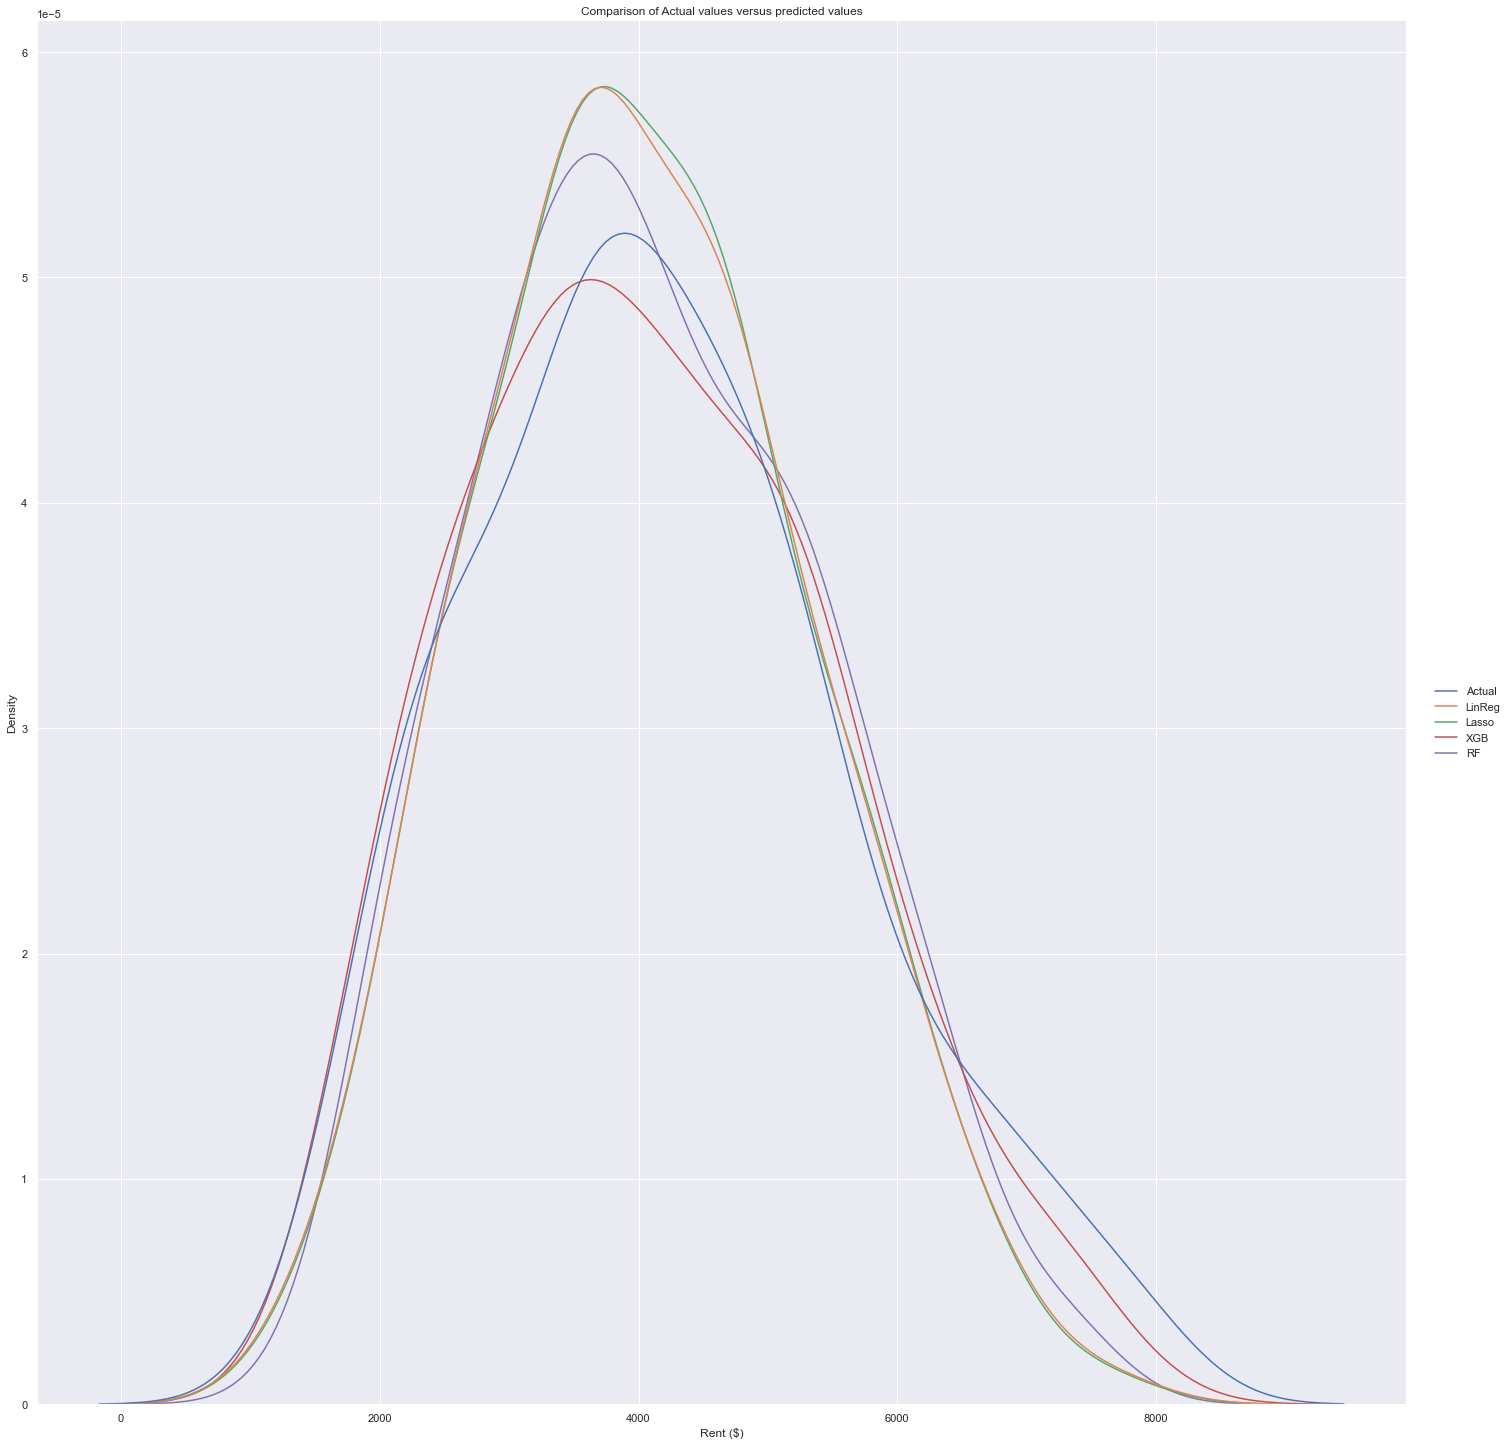

In [257]:
# Plot the results on a distribution 
plt.figure(figsize = (10,15))

ax = sns.displot(data = results_df, kind='kde', height = 20)
plt.title('Comparison of Actual values versus predicted values')
plt.xlabel('Rent ($)')
plt.show()

Both the XGB and Rand Forest models appear to be very similar. This was too be expected as this problem is well suited to tree based models. XGBoost has a slight edge in overall peformance so we will look at tuning the hyperparameters next. Focus will need to be placed on generalizing the model performance as it's definitely overfitting the data currently.

<Figure size 1008x576 with 0 Axes>

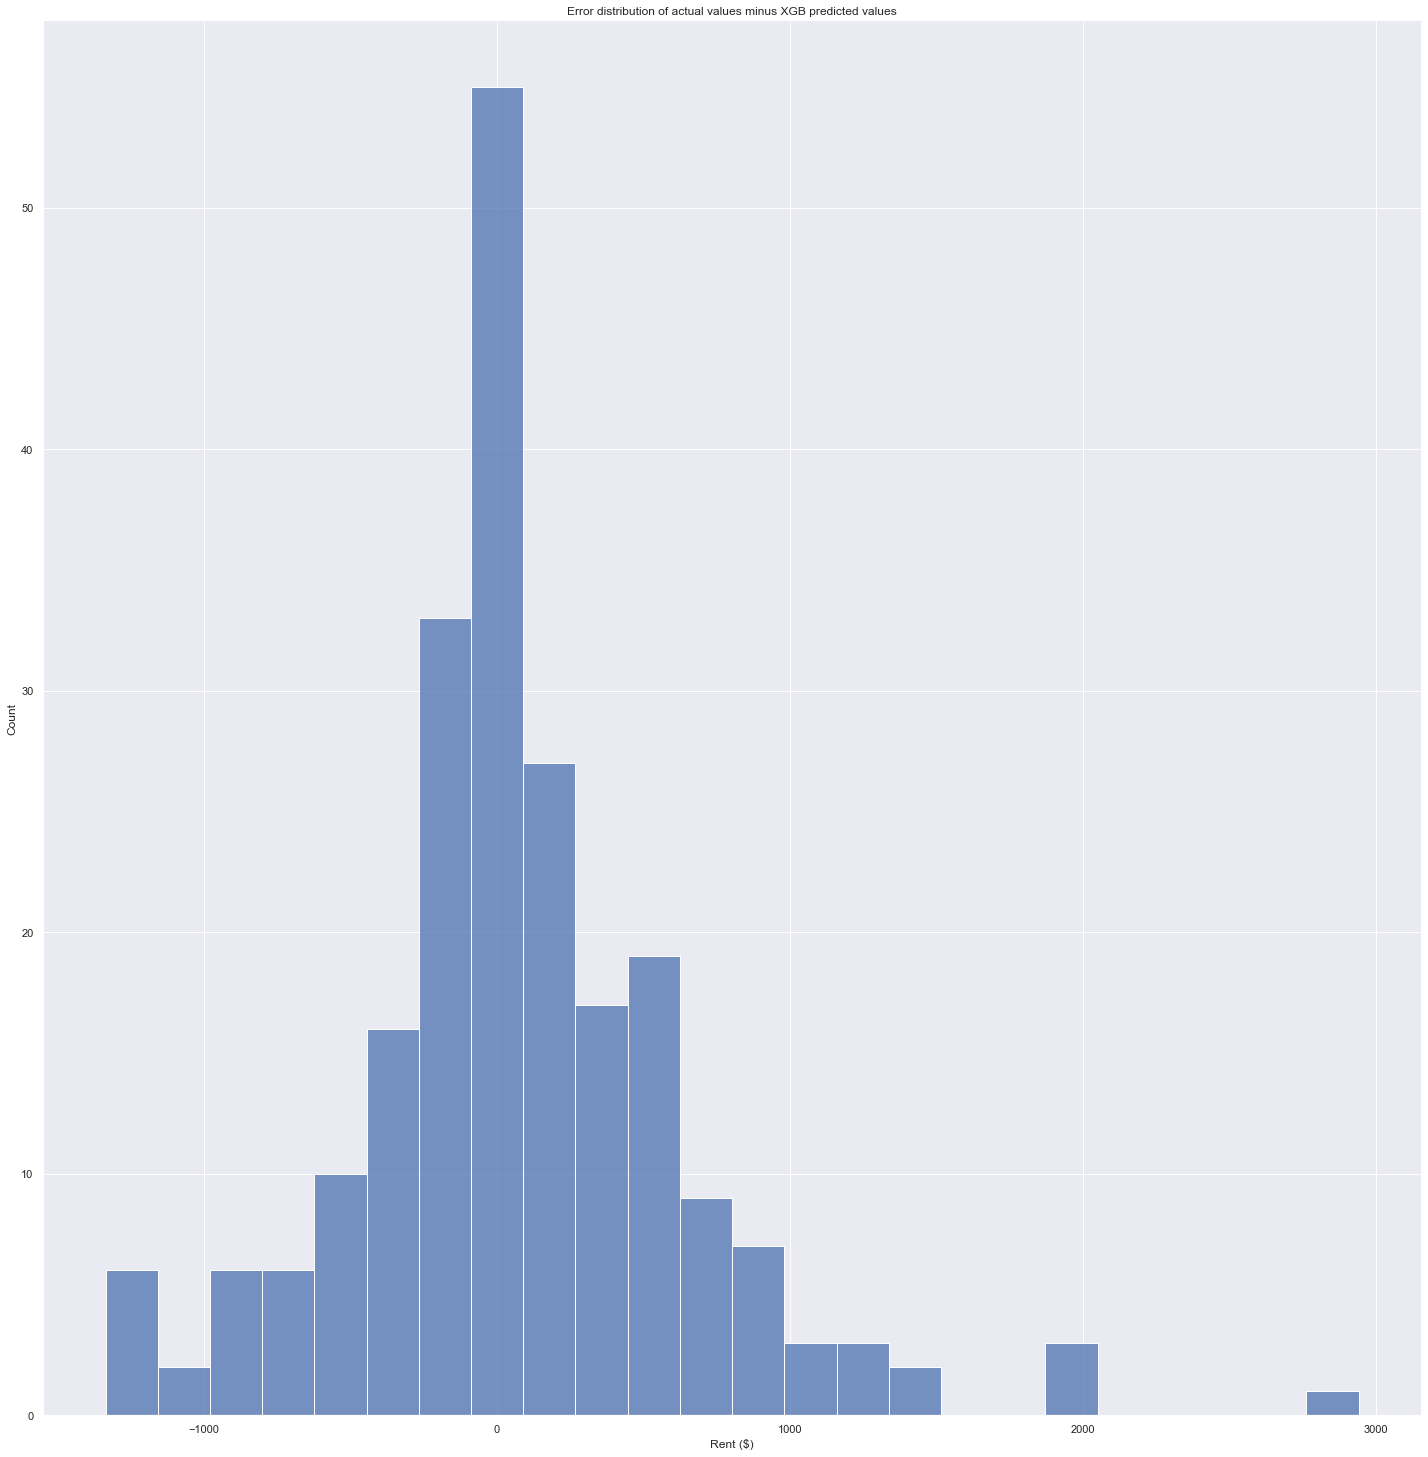

In [258]:
# Plot the results on a distribution 
plt.figure(figsize = (14,8))

ax = sns.displot(data = results_df.Actual-results_df.XGB, height = 20)
plt.title('Error distribution of actual values minus XGB predicted values')
plt.xlabel('Rent ($)')
plt.show()

At first glance, there are quite a few observations that have wildly incorrect predictions. It is worth investigating these data points to understand what happened. A few options could be the case:
* There could be incorrect values for the features,
* These units could be actual outliers that didn't show up in the EDA phase,
* or these could be bargains/overpriced units that are realistic

In [259]:
large_errors = results_df[abs(results_df.Actual-results_df.XGB) > 1000].join(X_test)
large_errors.sqft = np.exp(large_errors.sqft)
large_errors.head()

,Actual,LinReg,Lasso,XGB,RF,beds,baths,sqft,fitness_center,air_conditioning,...,cluster_1.0,cluster_2.0,cluster_3.0,cluster_4.0,cluster_5.0,cluster_6.0,cluster_7.0,cluster_8.0,cluster_9.0,cluster_16.0
416,2400.0,2799.480144,2830.853269,3598.524414,3228.587199,1,1.0,550.0,0,0,...,0,0,0,0,0,0,1,0,0,0
771,3750.0,2935.081624,2946.622725,2611.350586,2496.427295,2,1.0,1200.0,0,0,...,0,0,0,1,0,0,0,0,0,0
939,4495.0,5066.102988,5077.702908,5711.418945,5198.433819,3,2.0,950.0,0,0,...,0,0,0,0,0,0,1,0,0,0
865,3900.0,5639.455717,5645.243383,5017.638672,4544.777854,2,1.0,700.0,1,1,...,0,0,1,0,0,0,0,0,0,0
215,1900.0,2509.647066,2517.732512,3025.592041,3123.260328,1,1.0,650.0,0,1,...,1,0,0,0,0,0,0,0,0,0


### Actual versus Predicted

/var/folders/1v/2xtr296s1rz_4kd_c4kx7qh00000gn/T/ipykernel_55070/4062441232.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "m-" (-> color='m'). The keyword argument will take precedence.
  plb.plot(np.exp(xgb.predict(X_test)), p(np.exp(xgb.predict(X_test))), 'm-', color='red')


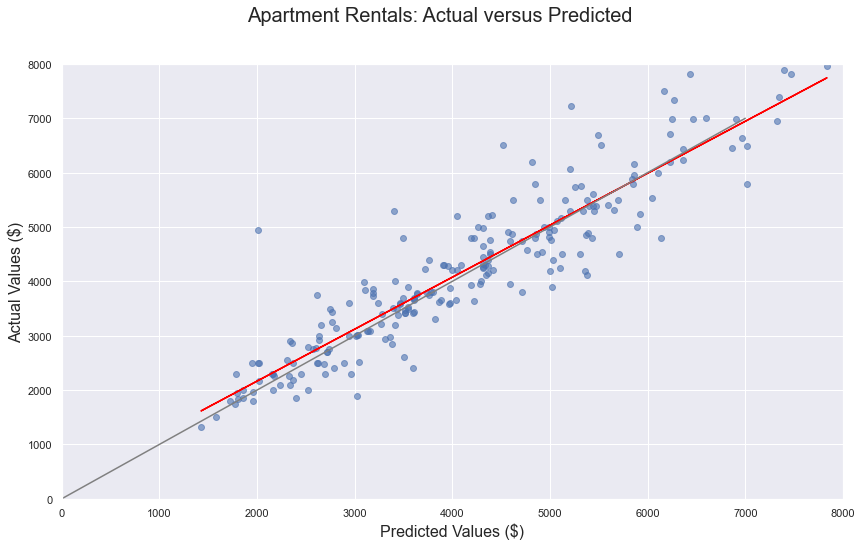

In [260]:
import matplotlib.pylab as plb 

plt.figure(figsize=(14, 8))
plt.scatter(np.exp(xgb.predict(X_test)), np.exp(y_test), alpha=.6) 

z = np.polyfit(np.exp(xgb.predict(X_test)), np.exp(y_test), 1)
p = np.poly1d(z)
plb.plot(np.exp(xgb.predict(X_test)), p(np.exp(xgb.predict(X_test))), 'm-', color='red')
plt.plot(np.linspace(0,7000,1000), np.linspace(0,7000,1000), color='grey')

plt.xlim(0, 8000)
plt.ylim(0, 8000)

plt.suptitle('Apartment Rentals: Actual versus Predicted', fontsize=20, fontname='Arial')
plt.xlabel('Predicted Values ($)', fontsize=16, fontname='Arial')
plt.ylabel('Actual Values ($)', fontsize=16, fontname='Arial');

Text(0, 0.5, 'Residuals ($)')

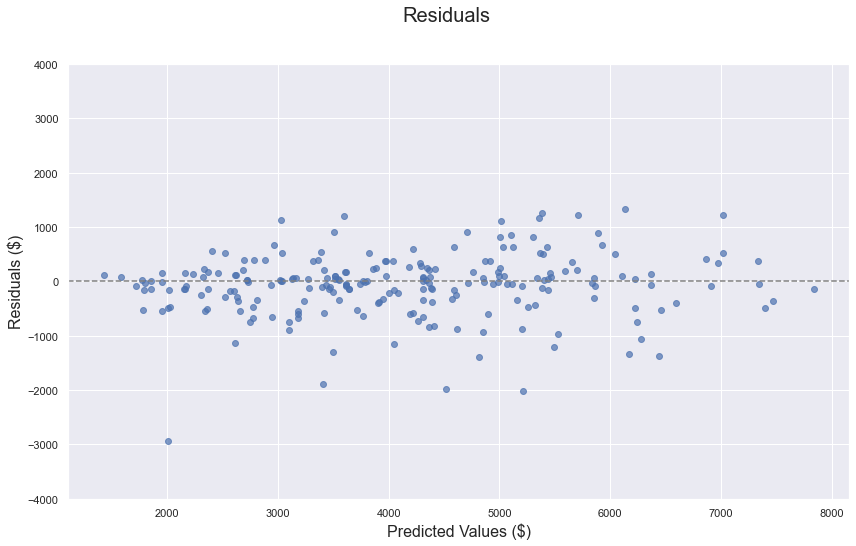

In [261]:
# Plot the residuals with respect to the predicted price

plt.figure(figsize=(14, 8))
plt.scatter((np.exp(xgb.predict(X_test))), (np.exp(xgb.predict(X_test)))-np.exp(y_test), alpha=.7)   

plt.axhline(0, linestyle='--', color='grey')
plt.suptitle('Residuals', fontsize=20, fontname='Arial')
plt.ylim(-4000, 4000)
plt.xlabel('Predicted Values ($)', fontsize=16, fontname='Arial')
plt.ylabel('Residuals ($)', fontsize=16, fontname='Arial')

## Evaluate the Feature Importances

In [262]:
# Extracting feature importances from the randomForest model
feature_importances = ({'Name':[],
                        'Score':[]})

for name, score in zip(X.columns, xgb.feature_importances_):
  feature_importances['Name'].append(name)
  feature_importances['Score'].append(score)

feature_importances = pd.DataFrame(feature_importances).sort_values(['Score'], ascending = False)

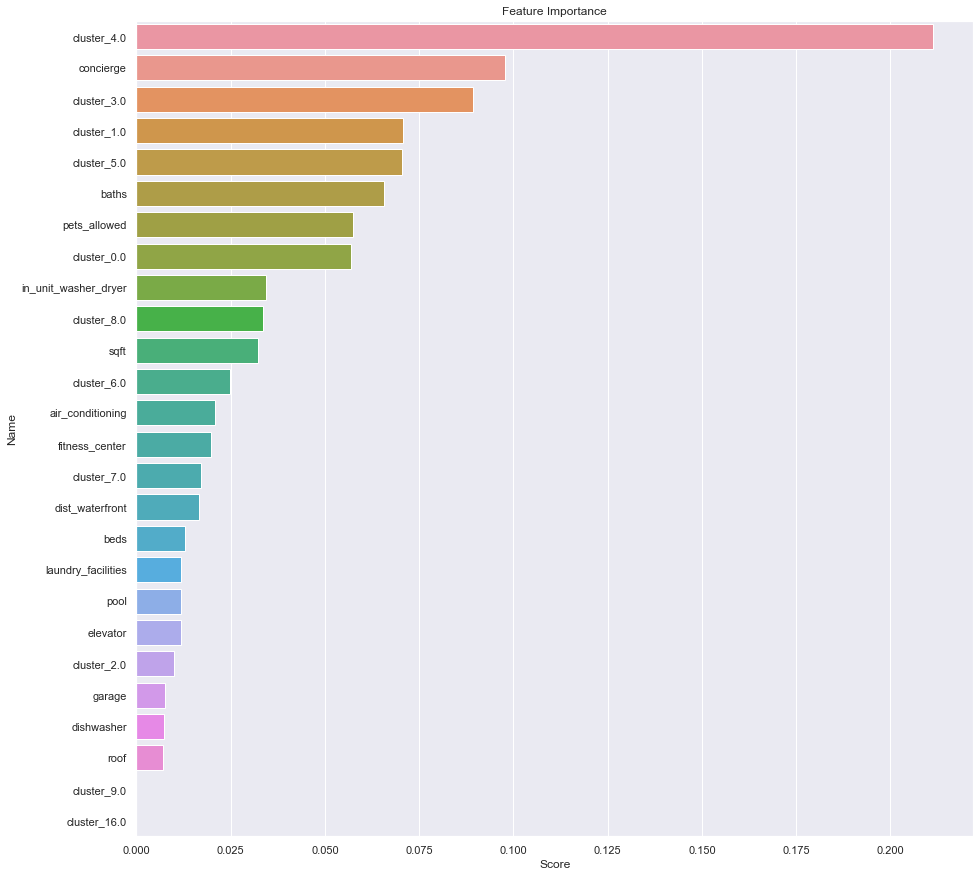

In [263]:
# Plot the feature importances
fig = plt.figure(figsize=(15,15))
sns.barplot(x = 'Score', y = 'Name', data = feature_importances)
plt.title('Feature Importance')
plt.show()

## Hyperparameter Tuning for XGBoost

In [230]:
params = {"n_estimators": np.arange(100,1500,250),
"learning_rate": np.arange(0.1,0.3,0.025),
 "max_depth": np.arange(3,10,1),
 "min_child_weight": np.arange(3,20,2),
 "reg_alpha": np.arange(0,1,0.1)}

In [231]:
regressor=XGBRegressor()

In [232]:
search = RandomizedSearchCV(regressor, param_distributions=params, cv=5)

In [233]:
search.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                          scale_pos_weight=None, subsample=None,
                                          tree_method=None,
                                          validate

In [235]:
best_params=search.best_params_
best_params

# best_params = {'reg_alpha': 0.9,
#  'n_estimators': 600,
#  'min_child_weight': 5,
#  'max_depth': 9,
#  'learning_rate': 0.125}

{'reg_alpha': 0.5,
 'n_estimators': 850,
 'min_child_weight': 7,
 'max_depth': 5,
 'learning_rate': 0.27499999999999997}

In [236]:
xgb=XGBRegressor(n_estimators = best_params['n_estimators'], 
                max_depth = best_params['max_depth'],
                learning_rate = best_params['learning_rate'],
                reg_alpha = best_params['reg_alpha']
                )

xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.27499999999999997,
             max_delta_step=0, max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=850, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0.5, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [238]:
# Training data
pred_train = xgb.predict(X_train)
r2_train = r2_score(np.exp(y_train), np.exp(pred_train))
mse_train = np.sqrt(mean_squared_error(np.exp(y_train), np.exp(pred_train)))

# Test data
pred_test = xgb.predict(X_test)
r2_test = r2_score(np.exp(y_test), np.exp(pred_test))
mse_test = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(pred_test)))

# Print results
print('R squared training set', round(r2_train,2))
print('R squared test set', round(r2_test,2))
print('RMSE training set', round(mse_train, 2))
print('RMSE test set', round(mse_test, 2))

R squared training set 0.95
R squared test set 0.87
RMSE training set 344.07
RMSE test set 510.64


In [239]:
data = {'beds': 1, 'baths': 1, 'sqft': np.log(650), 'fitness_center': 1, 'air_conditioning': 1,
       'in_unit_washer_dryer': 1, 'laundry_facilities': 0, 'roof': 1, 'concierge': 1,
       'pool': 0, 'elevator': 1, 'garage': 0, 'dishwasher': 1, 'dist_waterfront': 0.5, 
       'pets_allowed': 1, 'cluster_0.0': 0, 'cluster_1.0': 0, 'cluster_2.0': 1, 
       'cluster_3.0': 0, 'cluster_4.0': 0, 'cluster_5.0': 0, 'cluster_6.0': 0, 'cluster_7.0': 0, 'cluster_8.0': 0, 
       'cluster_9.0': 0, 'cluster_16.0': 0
}

data_df = pd.DataFrame(data, index=[0])
rent_pearl = np.exp(xgb.predict(data_df))
rent_pearl

array([3780.7314], dtype=float32)

In [210]:
# Export the model for future use

# with open('../models/nyc_rent_prediction.pickle', 'wb') as handle:
#     pkl.dump(xgb, handle)